In [1]:
import pandas as pd
import numpy as np

In [2]:
data_dir = "Data/Downloads/"
churn_data = pd.read_excel(data_dir + "Telco_Churn_Data.xlsx")




In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.shape

(7043, 21)

In [5]:
# regex for matching n number of white spaces = ^[ \t]+$
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(r'^[ \t]+$', np.nan, regex=True)

In [6]:
# get data types of each column and null values
dataTypes = churn_data.dtypes
dataTypes = pd.Series(dataTypes, name='dataTypes')
missingValues = churn_data.apply(lambda x: sum(x.isnull().values), axis = 0)
missingValues = pd.Series(missingValues, name='missingValues')

In [7]:
dataTypes_and_missingValues = pd.concat([dataTypes, missingValues], axis=1).reset_index()

In [8]:
dataTypes_and_missingValues

,index,dataTypes,missingValues
0,customerID,object,0
1,gender,object,0
2,SeniorCitizen,int64,0
3,Partner,object,0
4,Dependents,object,0
5,tenure,int64,0
6,PhoneService,object,0
7,MultipleLines,object,0
8,InternetService,object,0
9,OnlineSecurity,object,0


In [9]:
# get unique values of categorical variables (Although this should be done when exploring the data 
#     in excel or tableau or trifacta or any other exploratory tool)

unqiueValues = []
for col in churn_data:
    unqiueValues.append((col, churn_data[col].unique(), churn_data[col].unique().size))
    
unqiueValues = pd.DataFrame(unqiueValues, columns=('index', 'unqiueValues', 'countOfUniqueVal'))


In [10]:
# column_details =  pd.join([dataTypes_and_missingValues, unqiueValues], axis=1, join_axes=)
column_details = dataTypes_and_missingValues.join(unqiueValues.set_index('index'), on='index')
# pd.concat([df1, df4], axis=1, join='inner')

In [11]:
column_details

,index,dataTypes,missingValues,unqiueValues,countOfUniqueVal
0,customerID,object,0,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
1,gender,object,0,"[Female, Male]",2
2,SeniorCitizen,int64,0,"[0, 1]",2
3,Partner,object,0,"[Yes, No]",2
4,Dependents,object,0,"[No, Yes]",2
5,tenure,int64,0,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,object,0,"[No, Yes]",2
7,MultipleLines,object,0,"[No phone service, No, Yes]",3
8,InternetService,object,0,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,object,0,"[No, Yes, No internet service]",3


In [12]:
churn_data.shape

(7043, 21)

In [13]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# HANDLING MISSING DATA
# 1 removing the rows
# churn_data = churn_data.dropna()
# 2 replacing by mean
# churn_data = churn_data.fillna(churn_data.mean())


In [16]:
churn_data.query('TotalCharges == MonthlyCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
70,2273-QCKXA,Male,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05,No
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
100,6380-ARCEH,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No


In [17]:
churn_data = churn_data.fillna(churn_data.mean())
# churn_data1 = churn_data.fillna(churn_data.mean())
# churn_data2 = churn_data.fillna(churn_data.query('Contract == 3').mean()) #Contract is Two year
# churn_data3 = churn_data.fillna(churn_data.query('Churn == 0').mean()) #Churn is no
# churn_data4 = churn_data.fillna(churn_data.query('Contract == 3').query('Churn == 0').mean()) # Contract is Two year and Churn is no
# churn_data5 = churn_data.fillna(churn_data.query('Contract == 3 & Churn == 0').mean())
# churn_data6 = churn_data.fillna(churn_data.interpolate())
# churn_data7 = churn_data.fillna(method='ffill')
# churn_data8 = churn_data.fillna(method='bfill')

In [18]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
# FIND AND HANDLE OUTLIERS

In [20]:
# Converting column values to numeric categories
def normalize_categorical_features(data_frame, col_name, oldValue, newValue):
#     dummy_df = pd.get_dummies(churn_data[col_name])
#     churn_data = churn_data.join(dummy_df)
    data_frame.loc[(data_frame[col_name] == oldValue), [col_name]] = newValue
    return data_frame

In [21]:
def convert_data_type(data_frame, col_name):
#     NEEDS ERROR HANDLING
    data_frame[col_name] = data_frame[col_name].astype(int)
    return data_frame

In [22]:
# Feature Engineering
churn_data = normalize_categorical_features(churn_data, "gender", "Male", "1")
churn_data = normalize_categorical_features(churn_data, "gender", "Female", "0")
churn_data = convert_data_type(churn_data, "gender")

churn_data = normalize_categorical_features(churn_data, "Partner", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "Partner", "No", "0")
churn_data = convert_data_type(churn_data, "Partner")

churn_data = normalize_categorical_features(churn_data, "Dependents", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "Dependents", "No", "0")
churn_data = convert_data_type(churn_data, "Dependents")

churn_data = normalize_categorical_features(churn_data, "PhoneService", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "PhoneService", "No", "0")
churn_data = convert_data_type(churn_data, "PhoneService")

churn_data = normalize_categorical_features(churn_data, "MultipleLines", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "MultipleLines", "No", "0")
churn_data = normalize_categorical_features(churn_data, "MultipleLines", "No phone service", "2")
churn_data = convert_data_type(churn_data, "MultipleLines")

churn_data = normalize_categorical_features(churn_data, "InternetService", "Fiber optic", "1")
churn_data = normalize_categorical_features(churn_data, "InternetService", "DSL", "2")
churn_data = normalize_categorical_features(churn_data, "InternetService", "No", "0")
churn_data = convert_data_type(churn_data, "InternetService")

churn_data = normalize_categorical_features(churn_data, "OnlineSecurity", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "OnlineSecurity", "No", "0")
churn_data = normalize_categorical_features(churn_data, "OnlineSecurity", "No internet service", "2")
churn_data = convert_data_type(churn_data, "OnlineSecurity")

churn_data = normalize_categorical_features(churn_data, "OnlineBackup", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "OnlineBackup", "No", "0")
churn_data = normalize_categorical_features(churn_data, "OnlineBackup", "No internet service", "2")
churn_data = convert_data_type(churn_data, "OnlineBackup")

churn_data = normalize_categorical_features(churn_data, "DeviceProtection", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "DeviceProtection", "No", "0")
churn_data = normalize_categorical_features(churn_data, "DeviceProtection", "No internet service", "2")
churn_data = convert_data_type(churn_data, "DeviceProtection")

churn_data = normalize_categorical_features(churn_data, "TechSupport", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "TechSupport", "No", "0")
churn_data = normalize_categorical_features(churn_data, "TechSupport", "No internet service", "2")
churn_data = convert_data_type(churn_data, "TechSupport")

churn_data = normalize_categorical_features(churn_data, "StreamingTV", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "StreamingTV", "No", "0")
churn_data = normalize_categorical_features(churn_data, "StreamingTV", "No internet service", "2")
churn_data = convert_data_type(churn_data, "StreamingTV")

churn_data = normalize_categorical_features(churn_data, "StreamingMovies", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "StreamingMovies", "No", "0")
churn_data = normalize_categorical_features(churn_data, "StreamingMovies", "No internet service", "2")
churn_data = convert_data_type(churn_data, "StreamingMovies")

churn_data = normalize_categorical_features(churn_data, "Contract", "Month-to-month", "1")
churn_data = normalize_categorical_features(churn_data, "Contract", "One year", "2")
churn_data = normalize_categorical_features(churn_data, "Contract", "Two year", "3")
churn_data = convert_data_type(churn_data, "Contract")
 
churn_data = normalize_categorical_features(churn_data, "PaperlessBilling", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "PaperlessBilling", "No", "0")
churn_data = convert_data_type(churn_data, "PaperlessBilling")

churn_data = normalize_categorical_features(churn_data, "PaymentMethod", "Electronic check", "1")
churn_data = normalize_categorical_features(churn_data, "PaymentMethod", "Mailed check", "2")
churn_data = normalize_categorical_features(churn_data, "PaymentMethod", "Bank transfer (automatic)", "3")
churn_data = normalize_categorical_features(churn_data, "PaymentMethod", "Credit card (automatic)", "4")
churn_data = convert_data_type(churn_data, "PaymentMethod")

churn_data = normalize_categorical_features(churn_data, "Churn", "Yes", "1")
churn_data = normalize_categorical_features(churn_data, "Churn", "No", "0")
churn_data = convert_data_type(churn_data, "Churn")

# Another Way to do this is by using factorize method --> levels are the unique values and labels are the values for each record

# labels,levels = pd.factorize(churn_data.PaymentMethod)
# churn_data.PaymentMethod = labels

In [25]:
# Feature Engineering
# Putting continuos variables in custom buckets

# Define the buckets with function range(start, stop, step)
mybins = range(0, churn_data.tenure.max(), 10)

# Cut the data with the help of the bins
churn_data['tenure_bucket'] = pd.cut(churn_data.tenure, bins=mybins)

# Count the number of values per bucket
churn_data['tenure_bucket'].value_counts()

# Label the buckets
labels,levels = pd.factorize(churn_data.tenure_bucket)
churn_data.tenure_bucket = labels


# ________________________________
# Range for float value
import decimal

def drange(x, y, jump):
    while (x < y):
        yield float(x)
        x += decimal.Decimal(jump)
# ________________________________
    
# Same for monthly charges

mybins2 = list(drange(0, churn_data.MonthlyCharges.max(), 10.0))[-1]
churn_data['MonthlyCharges_bucket'] = pd.cut(churn_data.MonthlyCharges, bins=mybins2)
churn_data['MonthlyCharges_bucket'].value_counts()
labels,levels = pd.factorize(churn_data.MonthlyCharges_bucket)
churn_data.MonthlyCharges_bucket = labels

# Same for total charges
mybins3 = list(drange(0, churn_data.TotalCharges.max(), 10.0))[-1]
churn_data['TotalCharges_bucket'] = pd.cut(churn_data.TotalCharges, bins=mybins3)
churn_data['TotalCharges_bucket'].value_counts()
labels,levels = pd.factorize(churn_data.TotalCharges_bucket)
churn_data.TotalCharges_bucket = labels



In [26]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bucket,MonthlyCharges_bucket,TotalCharges_bucket
0,7590-VHVEG,0,0,1,0,1,0,2,2,0,...,0,1,1,1,29.85,29.85,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,0,2,0,2,56.95,1889.50,0,1,1,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,1,1,2,53.85,108.15,1,0,2,2
3,7795-CFOCW,1,0,0,0,45,0,2,2,1,...,0,2,0,3,42.30,1840.75,0,2,3,3
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,1,1,1,70.70,151.65,1,0,4,4


In [27]:
# Dropping Unwanted/Unusable Columns
del churn_data['customerID'] #   Because it is a string and is not used anywhere 
     #  (We can also change it to numerical value if we want to keep the identity of the records)


In [28]:
# Feature Selection

# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = churn_data.iloc[:,0:22]
Y = churn_data.iloc[:,-1]
names = churn_data.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.17399999999999999, 'TotalCharges'), (0.1547, 'MonthlyCharges'), (0.11509999999999999, 'tenure'), (0.1055, 'MonthlyCharges_bucket'), (0.062799999999999995, 'PaymentMethod'), (0.044200000000000003, 'tenure_bucket'), (0.036299999999999999, 'gender'), (0.030599999999999999, 'Contract'), (0.030499999999999999, 'PaperlessBilling'), (0.027900000000000001, 'Partner'), (0.0264, 'Dependents'), (0.023599999999999999, 'MultipleLines'), (0.021299999999999999, 'OnlineSecurity'), (0.020299999999999999, 'Churn'), (0.019699999999999999, 'SeniorCitizen'), (0.018700000000000001, 'TechSupport'), (0.0183, 'StreamingTV'), (0.0178, 'OnlineBackup'), (0.016899999999999998, 'DeviceProtection'), (0.016, 'StreamingMovies'), (0.0149, 'InternetService'), (0.0044999999999999997, 'PhoneService')]


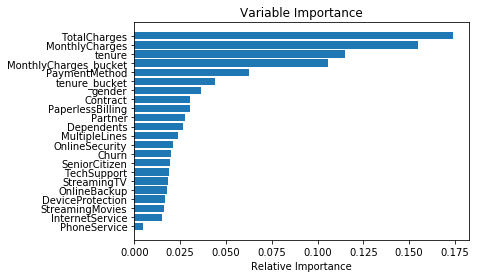

In [29]:
# Import `pyplot` and `numpy`
import matplotlib.pyplot as plt
import numpy as np

# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [30]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(churn_data)


# print out the reduced data
print(reduced_data)

[[-2524.636001   -1062.89128092]
 [ -703.70606338 -1442.26564566]
 [-2447.37279764 -1076.99213629]
 ..., 
 [-1650.03181023  1575.00816516]
 [-1796.44106077  1067.22223391]
 [ 4936.89767967  1325.68087257]]


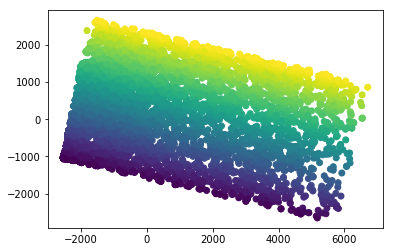

In [31]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap = 'viridis')

plt.show()

In [32]:
# Correlation Identification With Pandas
# Pearson correlation
churn_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bucket,MonthlyCharges_bucket,TotalCharges_bucket
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,0.000863,-0.003429,-0.002032,...,-0.000191,0.000126,-0.011754,-0.005209,-0.014569,0.000048,-0.008612,-0.004771,0.012691,-0.002643
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.032310,-0.210897,-0.152780,...,-0.120802,-0.142554,0.156530,-0.093704,0.220173,0.102395,0.150889,0.013562,0.046068,0.058648
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000891,0.081850,0.087055,...,0.075779,0.294806,-0.014877,0.133115,0.096848,0.318812,-0.150448,0.104687,0.055829,0.148473
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.044590,0.190523,0.162445,...,0.125820,0.243187,-0.111377,0.123844,-0.113890,0.064535,-0.164221,0.053332,-0.010956,0.041357
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.030359,0.145298,0.178651,...,0.140781,0.671607,0.006152,0.340305,0.247900,0.824757,-0.352229,0.300885,0.101992,0.358909
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.387436,0.125353,0.150338,...,0.165205,0.002247,0.016505,-0.004070,0.247398,0.112851,0.011942,-0.000025,-0.152530,-0.000624
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.340949,-0.235021,-0.210372,...,-0.195815,0.078613,0.108230,0.030659,0.146153,0.251095,0.019423,0.066972,0.252415,0.130090
InternetService,0.000863,0.032310,-0.000891,-0.044590,0.030359,-0.387436,0.340949,1.000000,-0.607788,-0.658287,...,-0.709020,-0.099721,0.138625,-0.008124,0.323260,0.175429,0.047291,0.001147,0.297812,0.091176
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.607788,1.000000,0.751661,...,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.153051,-0.332819,0.025156,-0.203396,-0.054711
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.658287,0.751661,1.000000,...,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.084920,-0.291449,0.044747,-0.223950,-0.036297


In [33]:
# Correlation Identification With Pandas
# Kendall Tau correlation
churn_data.rank()
churn_data.corr('kendall')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bucket,MonthlyCharges_bucket,TotalCharges_bucket
gender,1.000000,-0.001874,-0.001808,0.010517,0.002877,-0.006488,-0.001901,0.001438,-0.005075,-0.003159,...,-0.000981,0.001042,-0.011754,-0.004487,-0.011224,-0.000901,-0.008612,-0.004574,0.009615,-0.003781
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.015315,0.008576,0.111605,0.016075,-0.197900,-0.134970,...,-0.103122,-0.136998,0.156530,-0.094630,0.180636,0.087347,0.150889,0.012679,0.041911,0.046745
Partner,-0.001808,0.016479,1.000000,0.452676,0.317714,0.017706,0.103746,-0.000853,0.091322,0.093601,...,0.079460,0.281830,-0.014877,0.119529,0.088626,0.280287,-0.150448,0.082415,0.044365,0.124749
Dependents,0.010517,-0.211185,0.452676,1.000000,0.135506,-0.001762,-0.018922,-0.032572,0.183999,0.152296,...,0.113951,0.232493,-0.111377,0.117917,-0.087439,0.068334,-0.164221,0.043809,-0.014349,0.035858
tenure,0.002877,0.015315,0.317714,0.135506,1.000000,0.007002,0.224798,0.022428,0.140796,0.163020,...,0.127849,0.545823,0.006351,0.253198,0.190565,0.730918,-0.302965,0.245540,0.061971,0.275089
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.007002,1.000000,-0.548687,-0.379372,0.104498,0.134041,...,0.151093,0.001754,0.016505,-0.003655,0.195863,0.069054,0.011942,-0.001147,-0.103202,0.000503
MultipleLines,-0.001901,0.111605,0.103746,-0.018922,0.224798,-0.548687,1.000000,0.282607,-0.195139,-0.167224,...,-0.152967,0.080115,0.122453,0.021308,0.200975,0.260468,0.023870,0.059075,0.211589,0.118937
InternetService,0.001438,0.016075,-0.000853,-0.032572,0.022428,-0.379372,0.282607,1.000000,-0.433022,-0.521962,...,-0.602406,-0.070833,0.111764,-0.006666,0.088426,0.139058,0.027187,-0.000475,0.218931,0.065646
OnlineSecurity,-0.005075,-0.197900,0.091322,0.183999,0.140796,0.104498,-0.195139,-0.433022,1.000000,0.619589,...,0.560451,0.369234,-0.306893,0.205559,-0.403780,-0.085099,-0.324798,0.020418,-0.146027,-0.026401
OnlineBackup,-0.003159,-0.134970,0.093601,0.152296,0.163020,0.134041,-0.167224,-0.521962,0.619589,1.000000,...,0.591700,0.325269,-0.230659,0.169757,-0.310530,-0.039244,-0.276942,0.037560,-0.166303,-0.014223


In [34]:
# Correlation Identification With Pandas
# Spearman Rank correlation
churn_data.rank()
churn_data.corr('spearman')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bucket,MonthlyCharges_bucket,TotalCharges_bucket
gender,1.000000,-0.001874,-0.001808,0.010517,0.003486,-0.006488,-0.001969,0.001517,-0.005346,-0.003334,...,-0.001036,0.001094,-0.011754,-0.004904,-0.013736,-0.001103,-0.008612,-0.005231,0.011645,-0.004629
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.018556,0.008576,0.115585,0.016964,-0.208471,-0.142436,...,-0.108873,-0.143850,0.156530,-0.103416,0.221067,0.106968,0.150889,0.014502,0.050758,0.057230
Partner,-0.001808,0.016479,1.000000,0.452676,0.384931,0.017706,0.107446,-0.000900,0.096200,0.098779,...,0.083891,0.295925,-0.014877,0.130628,0.108463,0.343250,-0.150448,0.094264,0.053730,0.152729
Dependents,0.010517,-0.211185,0.452676,1.000000,0.164175,-0.001762,-0.019597,-0.034373,0.193828,0.160720,...,0.120306,0.244120,-0.111377,0.128865,-0.107011,0.083685,-0.164221,0.050108,-0.017378,0.043900
tenure,0.003486,0.018556,0.384931,0.164175,1.000000,0.008483,0.282361,0.028575,0.179074,0.207812,...,0.163182,0.667623,0.007695,0.336847,0.276417,0.885659,-0.367062,0.310250,0.091561,0.394639
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008483,1.000000,-0.568254,-0.400349,0.110079,0.141455,...,0.159519,0.001842,0.016505,-0.003994,0.239701,0.084566,0.011942,-0.001312,-0.124987,0.000616
MultipleLines,-0.001969,0.115585,0.107446,-0.019597,0.282361,-0.568254,1.000000,0.295600,-0.213155,-0.180329,...,-0.163321,0.087148,0.126820,0.024070,0.253421,0.334141,0.024721,0.070268,0.260204,0.150695
InternetService,0.001517,0.016964,-0.000900,-0.034373,0.028575,-0.400349,0.295600,1.000000,-0.506265,-0.582974,...,-0.653000,-0.079586,0.117944,-0.004893,0.206889,0.188656,0.028690,-0.000595,0.279285,0.084973
OnlineSecurity,-0.005346,-0.208471,0.096200,0.193828,0.179074,0.110079,-0.213155,-0.506265,1.000000,0.668720,...,0.617051,0.406696,-0.323286,0.244010,-0.526906,-0.111859,-0.342148,0.024249,-0.191443,-0.034004
OnlineBackup,-0.003334,-0.142436,0.098779,0.160720,0.207812,0.141455,-0.180329,-0.582974,0.668720,1.000000,...,0.643650,0.358715,-0.243418,0.202219,-0.431753,-0.057050,-0.292262,0.044965,-0.220635,-0.018687


In [35]:
# Classification Algorithns

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix



def kNNClassifier(X_train,X_test, y_train, y_test):
    print("______________________START OF kNN____________________")

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train) 
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

#     result = pd.crosstab(y_test, X_test, rownames=['actual'], colnames=['preds'])

    pred = knn.predict(X_test)


    print (accuracy_score(y_test, pred))

#     print(result)
    # CONFUSION MATRIX
    confusion_mat = confusion_matrix(y_test, pred, labels=[0,1])
    print(confusion_mat)

    print("______________________END OF kNN____________________")

In [37]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *

def NeuralNetworkClassifier_(X_train,X_test, y_train, y_test):

    print("______________________START OF NEURAL NETWORK CLASSIFIER____________________")
    clf = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(100,20), random_state=1)

    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)

    train_pred = clf.predict(X_train)

    # R-squared score of this model

    rsq = r2_score(y_train, train_pred)

    # MEAN ABSOLUTE ERROR
    mean_ae = mean_absolute_error(y_test, pred)

    # MEAN SQUARED ERROR
    mean_sqe = mean_squared_error(y_test, pred)

    # MEDIAN ABSOLUTE ERROR
    median_ae = median_absolute_error(y_test, pred)

    print("R-squared error : " + str(rsq) )

    print("MEAN ABSOLUTE ERROR  : " + str(mean_ae) )

    print("MEAN SQUARED ERROR : " + str(mean_sqe) )

    print("MEDIAN ABSOLUTE ERROR : " + str(median_ae) )

    print (accuracy_score(y_test, pred))

    # CONFUSION MATRIX
    confusion_mat = confusion_matrix(y_test, pred, labels=[0,1])
    print(confusion_mat)

    print("______________________END OF Neural Network Classifier____________________")

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

def RandomForestClassifier_(X_train,X_test, y_train, y_test, _n_jobs, _n_estimators):

    print("______________________START OF RANDOM FOREST CLASSIFIER____________________")


    clf = RandomForestClassifier(n_estimators= _n_estimators, criterion='gini', max_depth=None,
                                 min_samples_split=100, min_samples_leaf=10, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
                                 bootstrap=True, oob_score=False, n_jobs=_n_jobs, random_state=None,
                                 verbose=0, warm_start=False, class_weight=None)
    clf.fit(X_train, y_train)


    pred = clf.predict(X_test)


    print (accuracy_score(y_test, pred))


    # CONFUSION MATRIX
    confusion_mat = confusion_matrix(y_test, pred, labels=[0,1])
    print(confusion_mat)


    print("______________________END OF RANDOM FOREST CLASSIFIER____________________")

In [39]:
from sklearn import linear_model
from sklearn.metrics import *
from sklearn import metrics
def LogisticRegression(X_train,X_test, y_train, y_test):

    print("______________________START OF LOGISTIC REGRESSION____________________")

    lm = linear_model.LogisticRegression()
    lm.fit(X_train, y_train)
    
    
    
    train_pred = lm.predict(X_train)

    # R-squared score of this model
    
    rsq = r2_score(y_train, train_pred)

    pred = lm.predict(X_test)

    # MEAN ABSOLUTE ERROR
    mean_ae = mean_absolute_error(y_test, pred)

    # MEAN SQUARED ERROR
    mean_sqe = mean_squared_error(y_test, pred)

    # MEDIAN ABSOLUTE ERROR
    median_ae = median_absolute_error(y_test, pred)

    print("R-squared error : " + str(rsq) )

    print("MEAN ABSOLUTE ERROR  : " + str(mean_ae) )

    print("MEAN SQUARED ERROR : " + str(mean_sqe) )

    print("MEDIAN ABSOLUTE ERROR : " + str(median_ae) )

    print (accuracy_score(y_test, pred))

    # CONFUSION MATRIX
    confusion_mat = confusion_matrix(y_test, pred, labels=[0,1])
    print(confusion_mat)
    print("\nClassification Report: \n")
    print(metrics.classification_report(y_test, pred))
    
    print("______________________END OF LOGISTIC REGRESSION____________________")





In [40]:
 # SPLIT DATASET INTO TRAIN AND TEST

msk = np.random.rand(len(churn_data)) < 0.8

trainData = churn_data[msk]

testData = churn_data[~msk]

target = "Churn"

predictorVariables = ['TotalCharges', 'MonthlyCharges', 'tenure', 'MonthlyCharges_bucket','PaymentMethod','tenure_bucket']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]



In [41]:
# RUN CLASSIFICATION ALGORITHM ...... 
LogisticRegression(X_train,X_test, y_train, y_test)

______________________START OF LOGISTIC REGRESSION____________________
R-squared error : -0.0998532436647
MEAN ABSOLUTE ERROR  : 0.206438068579
MEAN SQUARED ERROR : 0.206438068579
MEDIAN ABSOLUTE ERROR : 0.0
0.793561931421
[[965  97]
 [198 169]]

Classification Report: 

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1062
          1       0.64      0.46      0.53       367

avg / total       0.78      0.79      0.78      1429

______________________END OF LOGISTIC REGRESSION____________________


In [42]:
kNNClassifier(X_train,X_test, y_train, y_test)

______________________START OF kNN____________________
0.773967809657
[[946 116]
 [207 160]]
______________________END OF kNN____________________


In [43]:
_n_jobs = 2
_n_estimators = 2
RandomForestClassifier_(X_train,X_test, y_train, y_test, _n_jobs, _n_estimators)

______________________START OF RANDOM FOREST CLASSIFIER____________________
0.805458362491
[[968  94]
 [184 183]]
______________________END OF RANDOM FOREST CLASSIFIER____________________


In [44]:
NeuralNetworkClassifier_(X_train,X_test, y_train, y_test)


______________________START OF NEURAL NETWORK CLASSIFIER____________________
R-squared error : -0.365272373541
MEAN ABSOLUTE ERROR  : 0.256822953114
MEAN SQUARED ERROR : 0.256822953114
MEDIAN ABSOLUTE ERROR : 0.0
0.743177046886
[[1062    0]
 [ 367    0]]
______________________END OF Neural Network Classifier____________________


In [45]:
# Hyoerparameter Tuning